In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/6.862_MachineLearningProject/BuildingEnergyConsumption/Code

/content/drive/MyDrive/6.862_MachineLearningProject/BuildingEnergyConsumption/Code


In [3]:
# Imports:
import numpy as np
import pandas as pd
import os
from os.path import join
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure
import datetime

from load_and_process_data import process_data
from load_electricity_school_data import load_electricity_education
from feature_encoding_and_data_splitting import split_data, prepare_data_simple_encoding, prepare_data_polynomial_encoding
from linear_regression_functions import learn_parameters, plot_loss_history, plot_test_and_prediction, plot_linear_regression_weights

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Description:

** TO DO: Write a bit more info here **

We refer the reader of this notebook to first read the READ_ME file on Github.

The full data for this project can be found on this website: https://www.kaggle.com/c/ashrae-energy-prediction/data I downloaded this data and placed it in a datafolder that I will read from in this code. 


In this notebook I will focus on understanding how different feature encoding affects predictions we can make about the data with linear regression model.

### 1. Load data:

In [4]:
# In colab import files like:
datafolder = '../Data/ashrae-energy-prediction/'
pd_all = process_data(datafolder)
# Load all Education buildings Electricity consumption data that has good 
# electricity meter reading values:
pd_educational = load_electricity_education(pd_all)

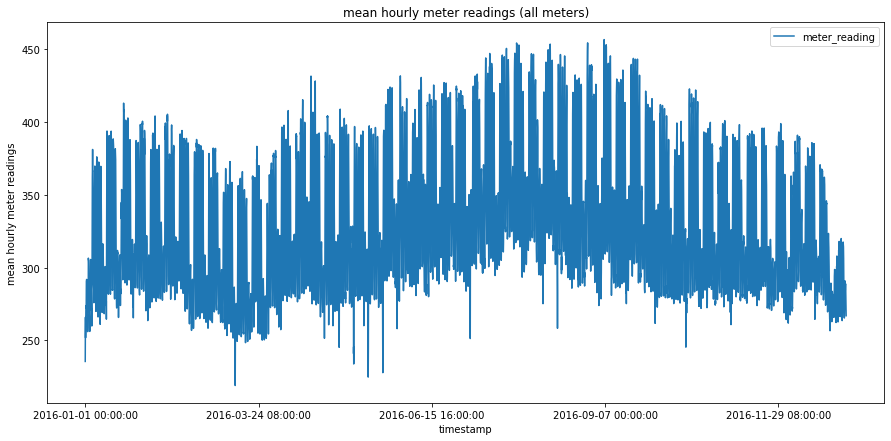

In [5]:
pd_educational.groupby(by = "timestamp").mean().filter(["timestamp", "meter_reading"]).plot(figsize =(15,7), ylabel = "mean hourly meter readings", title = "mean hourly meter readings (all meters)")
plt.show()

### 2. Linear regression on simply encoded data:

TO DO: Write more description of what this encoding does:

#### 2.1. Prepare data for linear regression fitting by doing feature encoding and splitting it into train and test:

In [6]:
train_data_s, test_data_s, timestamp_train_s, timestamp_test_s = prepare_data_simple_encoding(pd_educational) 

/content/drive/MyDrive/6.862_MachineLearningProject/BuildingEnergyConsumption/Code/feature_encoding_and_data_splitting.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd_test = pd_test[pd.to_datetime(pd_educational["timestamp"]) < datetime.datetime(2016, 7, 1)]


#### 2.2. Do linear regression fit:

In [7]:
linear_regression_model_s, history_s = learn_parameters(train_data_s, test_data_s, 0.00003, 256 )

Epoch 1/15
2823/2823 [==============================] - 6s 2ms/step - loss: 2.7539 - val_loss: 3.9703
Epoch 2/15
2823/2823 [==============================] - 4s 2ms/step - loss: 2.2127 - val_loss: 3.2699
Epoch 3/15
2823/2823 [==============================] - 4s 2ms/step - loss: 1.7728 - val_loss: 2.6451
Epoch 4/15
2823/2823 [==============================] - 4s 2ms/step - loss: 1.4359 - val_loss: 2.1169
Epoch 5/15
2823/2823 [==============================] - 4s 2ms/step - loss: 1.1698 - val_loss: 1.6844
Epoch 6/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.9627 - val_loss: 1.3560
Epoch 7/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.8195 - val_loss: 1.1190
Epoch 8/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.7222 - val_loss: 0.9574
Epoch 9/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.6534 - val_loss: 0.8508
Epoch 10/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.631

#### 2.3. Plot learning history of linear regression:

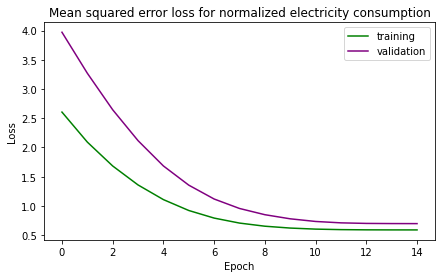

In [9]:
plot_loss_history(history_s)

#### 2.4. Plot test data and our prediction with this model for visual comparioson:

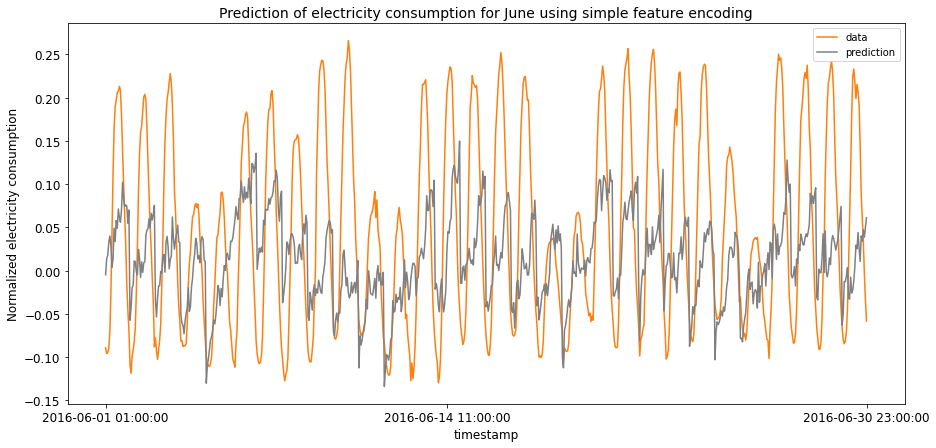

In [15]:
plot_test_and_prediction(test_data_s, timestamp_test_s, linear_regression_model_s, 'simple')

#### 2.5. Plot weights that our model gave to different encoded features:



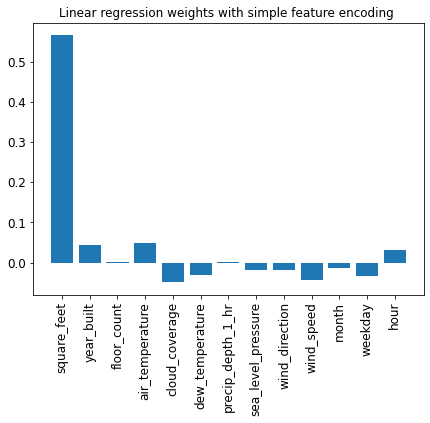

In [16]:
plot_linear_regression_weights(train_data_s,linear_regression_model_s, 'simple')

### 3. Linear regression on polynomially encoded data:

TO DO: Write more description here.

#### 3.1. Prepare data for linear regression fitting by doing feature encoding and splitting it into train and test:

In [17]:
train_data_p, test_data_p, timestamp_train_p, timestamp_test_p = prepare_data_polynomial_encoding(pd_educational) 

/content/drive/MyDrive/6.862_MachineLearningProject/BuildingEnergyConsumption/Code/feature_encoding_and_data_splitting.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd_test = pd_test[pd.to_datetime(pd_educational["timestamp"]) < datetime.datetime(2016, 7, 1)]


#### 3.2. Do linear regression fit:

In [18]:
linear_regression_model_p, history_p = learn_parameters(train_data_p, test_data_p, 0.00003, 256 )

Epoch 1/15
2823/2823 [==============================] - 5s 2ms/step - loss: 3.0397 - val_loss: 2.7316
Epoch 2/15
2823/2823 [==============================] - 4s 2ms/step - loss: 2.2548 - val_loss: 2.1157
Epoch 3/15
2823/2823 [==============================] - 4s 2ms/step - loss: 1.6582 - val_loss: 1.6343
Epoch 4/15
2823/2823 [==============================] - 4s 2ms/step - loss: 1.2193 - val_loss: 1.2722
Epoch 5/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.9375 - val_loss: 1.0191
Epoch 6/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.7538 - val_loss: 0.8655
Epoch 7/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.6586 - val_loss: 0.7870
Epoch 8/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.6188 - val_loss: 0.7456
Epoch 9/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.5990 - val_loss: 0.7194
Epoch 10/15
2823/2823 [==============================] - 4s 2ms/step - loss: 0.588

#### 3.3. Plot learning history of linear regression:

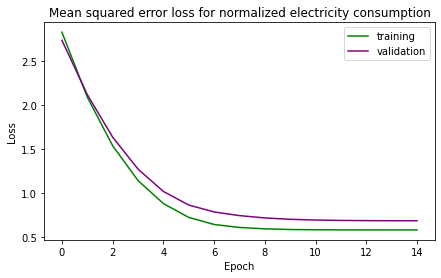

In [19]:
plot_loss_history(history_p)

#### 3.4. Plot test data and our prediction with this model for visual comparioson:

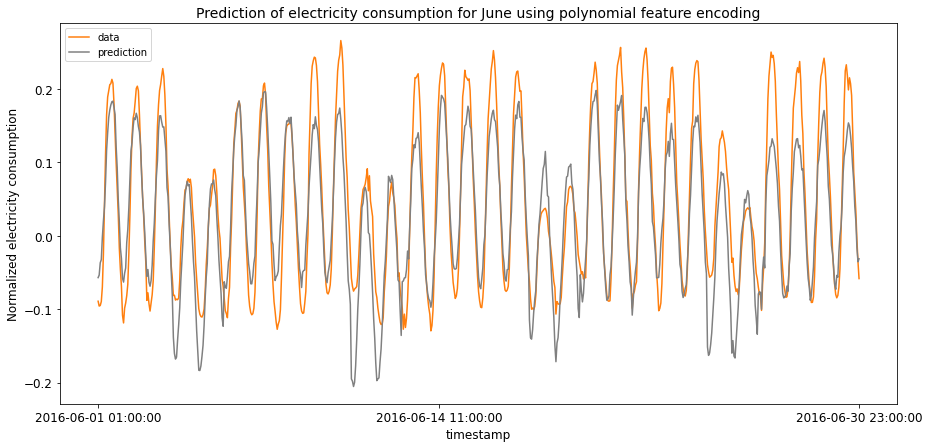

In [20]:
plot_test_and_prediction(test_data_p, timestamp_test_p, linear_regression_model_p, 'polynomial')

#### 3.5. Plot weights that our model gave to different encoded features:

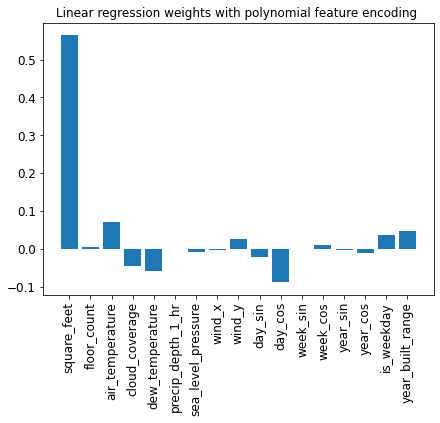

In [21]:
plot_linear_regression_weights(train_data_p,linear_regression_model_p, 'polynomial')